# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 8 - Lab 02: Decision Trees & Random Forests
**Instructor:** Amir Charkhi | **Type:** Hands-On Practice

> Master Tree-Based Models for Classification and Regression

## 🎯 Lab Objectives

In this lab, you'll practice:
- Building Decision Tree classifiers and regressors
- Understanding tree parameters and preventing overfitting
- Visualizing decision trees
- Building Random Forest ensembles
- Extracting feature importance
- Comparing tree models with linear models

**Time**: 40-50 minutes  
**Difficulty**: ⭐⭐⭐⭐☆ (Intermediate-Advanced)

---

## 📚 Quick Reference

**Decision Trees:**
```python
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Classification Tree
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_clf.fit(X_train, y_train)

# Regression Tree
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Feature importance
importances = model.feature_importances_

# Visualize tree
plot_tree(dt_clf, feature_names=features, class_names=classes, filled=True)
```

---

In [2]:
# Setup - Run this cell first!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score
)
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("✅ Setup complete! Let's grow some trees! 🌲")

✅ Setup complete! Let's grow some trees! 🌲


---

## 🌳 Exercise 1: Classification Trees

Let's start with Decision Tree classification!

### Task 1.1: Build a Simple Classification Tree

In [3]:
# Load Iris dataset for classification
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

print(f"Dataset: {len(X)} samples, {X.shape[1]} features, {len(np.unique(y))} classes")
print(f"Features: {list(X.columns)}")

# TODO 1.1: Build an unconstrained Decision Tree
# Steps:
#   1. Split data (80/20, stratified, random_state=42)
#   2. Create DecisionTreeClassifier with only random_state=42 (no constraints!)
#   3. Fit the model
#   4. Calculate train and test accuracy

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)   # Unconstrained tree
dt.fit(X_train, y_train)

train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)

# Validation (Don't modify)
print(f"\nTree Information:")
print(f"  Max depth: {dt.get_depth()}")
print(f"  Number of leaves: {dt.get_n_leaves()}")
print(f"  Training Accuracy: {train_acc:.4f}")
print(f"  Test Accuracy:     {test_acc:.4f}")
print(f"  Accuracy Gap:      {train_acc - test_acc:.4f}")

if train_acc > 0.95 and test_acc > 0.85:
    if train_acc - test_acc > 0.05:
        print("\n⚠️  High accuracy but large gap suggests overfitting!")
    print("\n✅ Tree trained successfully!")
    print("🎉 Task 1.1 Complete!")

Dataset: 150 samples, 4 features, 3 classes
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Tree Information:
  Max depth: 5
  Number of leaves: 8
  Training Accuracy: 1.0000
  Test Accuracy:     0.9333
  Accuracy Gap:      0.0667

⚠️  High accuracy but large gap suggests overfitting!

✅ Tree trained successfully!
🎉 Task 1.1 Complete!


### Task 1.2: Visualize the Decision Tree

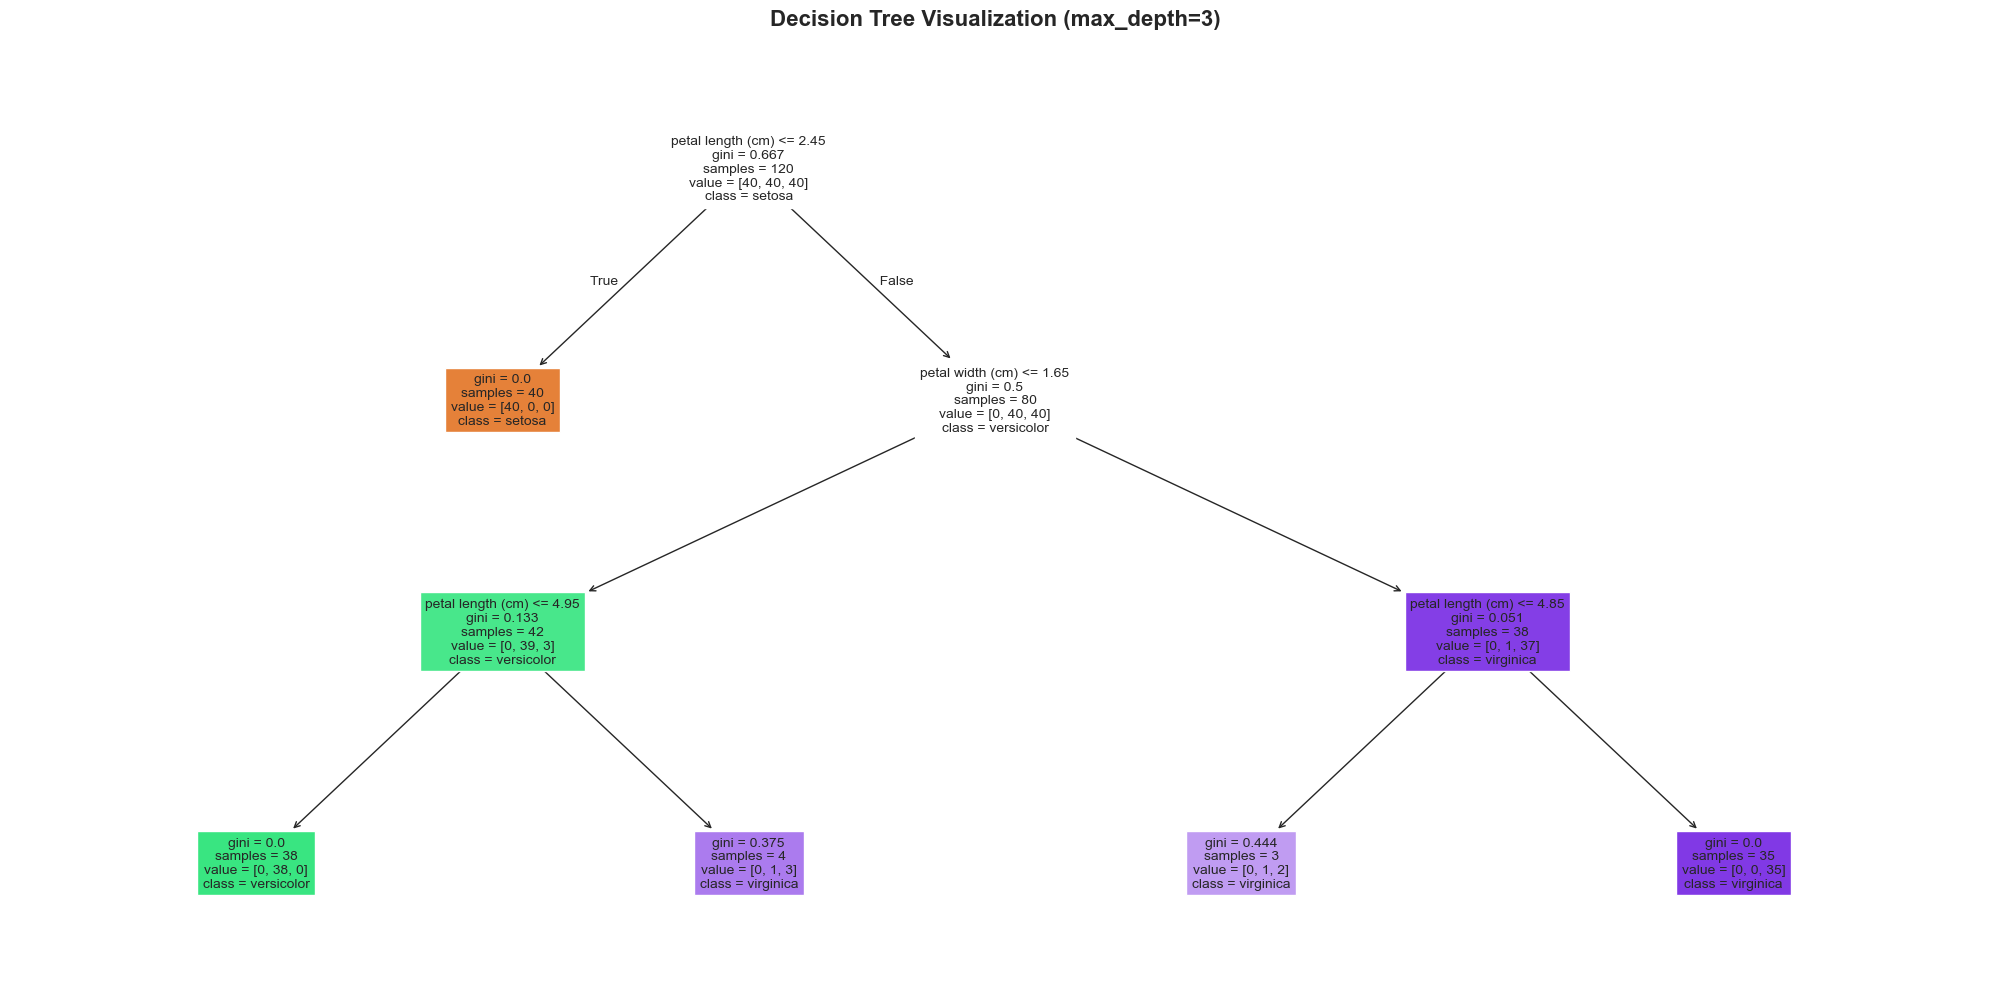


💡 How to read the tree:
  - Each box is a decision node or leaf
  - Top line: splitting rule (e.g., 'petal width <= 0.8')
  - 'gini': impurity measure (lower = more pure)
  - 'samples': number of training samples reaching this node
  - 'value': class distribution at this node
  - 'class': predicted class for this node

✅ Task 1.2 Complete!


In [4]:
# TODO 1.2: Visualize the decision tree
# Requirements:
#   1. Create a smaller tree (max_depth=3) for better visualization
#   2. Use plot_tree to visualize it
#   3. Include feature names and class names

# Your code here:
# Create a smaller tree for visualization
dt_small = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_small.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(20, 10))

plot_tree(
    dt_small,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    fontsize=10
)

plt.title('Decision Tree Visualization (max_depth=3)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 How to read the tree:")
print("  - Each box is a decision node or leaf")
print("  - Top line: splitting rule (e.g., 'petal width <= 0.8')")
print("  - 'gini': impurity measure (lower = more pure)")
print("  - 'samples': number of training samples reaching this node")
print("  - 'value': class distribution at this node")
print("  - 'class': predicted class for this node")
print("\n✅ Task 1.2 Complete!")

### Task 1.3: Preventing Overfitting

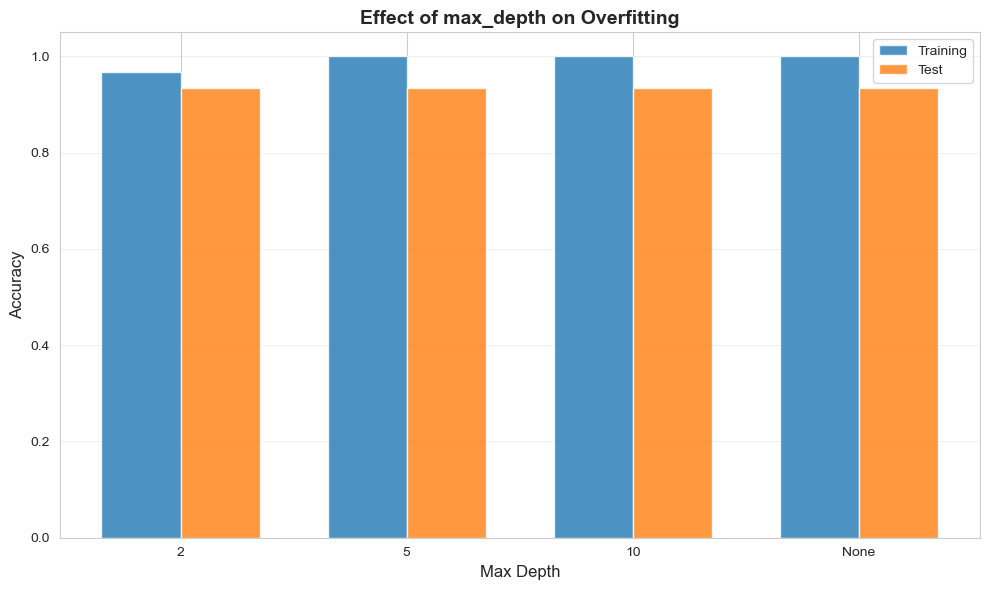


Best max_depth: 2
Test Accuracy: 0.9333

💡 Sweet spot: deep enough to learn patterns, shallow enough to generalize

✅ Task 1.3 Complete!


In [5]:
# TODO 1.3: Compare trees with different constraints
# Requirements:
#   1. Train 4 trees with different max_depth values: [2, 5, 10, None]
#   2. Calculate train and test accuracy for each
#   3. Plot the results
#   4. Identify the best max_depth

# Your code here:
max_depths = [2, 5, 10, None]
train_scores = []
test_scores = []

for depth in max_depths:
    # Create tree with this max_depth
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train and evaluate
    dt.fit(X_train, y_train)
    train_acc = dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)
    
    # Store results
    train_scores.append(train_acc)
    test_scores.append(test_acc)

# Visualize
depth_labels = [str(d) if d is not None else 'None' for d in max_depths]
x = np.arange(len(max_depths))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_scores, width, label='Training', alpha=0.8)
plt.bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Effect of max_depth on Overfitting', fontsize=14, fontweight='bold')
plt.xticks(x, depth_labels)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Find best depth
best_idx = np.argmax(test_scores)
best_depth = max_depths[best_idx]
print(f"\nBest max_depth: {best_depth}")
print(f"Test Accuracy: {test_scores[best_idx]:.4f}")
print("\n💡 Sweet spot: deep enough to learn patterns, shallow enough to generalize")
print("\n✅ Task 1.3 Complete!")

---

## 📊 Exercise 2: Regression Trees

Decision Trees work for regression too!

### Task 2.1: Build a Regression Tree

In [6]:
# Load California Housing for regression
housing = fetch_california_housing()
X_reg = pd.DataFrame(housing.data, columns=housing.feature_names)
y_reg = pd.Series(housing.target, name='MedHouseVal')

# TODO 2.1: Compare Linear Regression vs Decision Tree Regression
# Steps:
#   1. Split data (80/20, random_state=42)
#   2. Train LinearRegression
#   3. Train DecisionTreeRegressor (max_depth=10)
#   4. Calculate RMSE and R² for both
#   5. Compare the results

# Your code here:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

y_pred_lr = lr.predict(X_test_reg)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
r2_lr = r2_score(y_test_reg, y_pred_lr)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)

y_pred_dt = dt_reg.predict(X_test_reg)
rmse_dt = np.sqrt(mean_squared_error(y_test_reg, y_pred_dt))
r2_dt = r2_score(y_test_reg, y_pred_dt)

# Validation and Comparison
print("Model Comparison:")
print("="*60)
print(f"{'Model':<20} {'RMSE':>15} {'R²':>15}")
print("-"*60)
print(f"{'Linear Regression':<20} {rmse_lr:>15.4f} {r2_lr:>15.4f}")
print(f"{'Decision Tree':<20} {rmse_dt:>15.4f} {r2_dt:>15.4f}")
print("="*60)

if r2_dt > 0.6:
    print("\n✅ Decision Tree captures non-linear patterns!")
    print("🎉 Task 2.1 Complete!")

Model Comparison:
Model                           RMSE              R²
------------------------------------------------------------
Linear Regression             0.7456          0.5758
Decision Tree                 0.6445          0.6830

✅ Decision Tree captures non-linear patterns!
🎉 Task 2.1 Complete!


### Task 2.2: Visualize Predictions

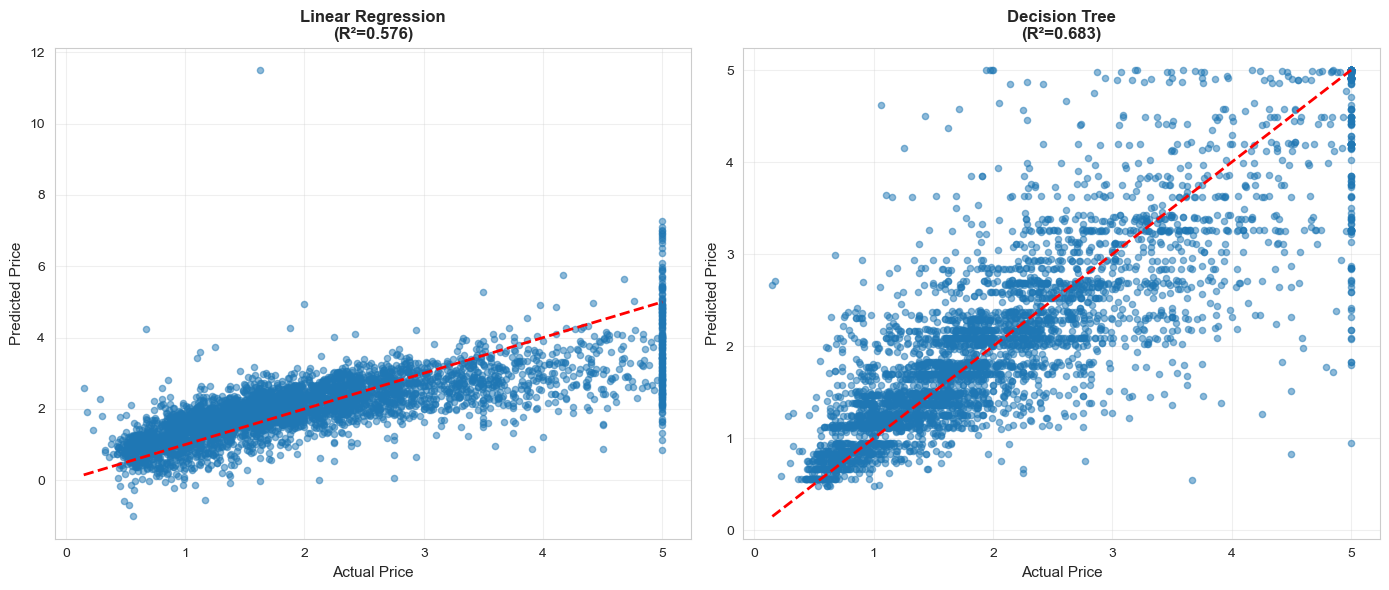

💡 Perfect predictions fall on the red diagonal line
✅ Task 2.2 Complete!


In [7]:
# TODO 2.2: Create prediction vs actual plots for both models
# Compare how well each model predicts

# Your code here:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear Regression plot
axes[0].scatter(y_test_reg, y_pred_lr, alpha=0.5, s=20)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price', fontsize=11)
axes[0].set_ylabel('Predicted Price', fontsize=11)
axes[0].set_title(f'Linear Regression\n(R²={r2_lr:.3f})', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Decision Tree plot
axes[1].scatter(y_test_reg, y_pred_dt, alpha=0.5, s=20)
axes[1].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price', fontsize=11)
axes[1].set_ylabel('Predicted Price', fontsize=11)
axes[1].set_title(f'Decision Tree\n(R²={r2_dt:.3f})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Perfect predictions fall on the red diagonal line")
print("✅ Task 2.2 Complete!")

---

## 🌲🌳🌲 Exercise 3: Random Forests

Many trees are better than one!

### Task 3.1: Build a Random Forest Classifier

In [8]:
# Back to Wine classification for better comparison
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = pd.Series(wine.target, name='wine_class')

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.2, stratify=y_wine, random_state=42
)

# TODO 3.1: Compare Decision Tree vs Random Forest
# Requirements:
#   1. Train Decision Tree (max_depth=10)
#   2. Train Random Forest (n_estimators=100, max_depth=10)
#   3. Compare accuracy and cross-validation scores
#   4. Show that Random Forest is more stable

# Your code here:
# Single Decision Tree
dt_single = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_single.fit(X_train_w, y_train_w)

dt_test_acc = accuracy_score(y_test_w, dt_single.predict(X_test_w))
dt_cv_scores = cross_val_score(dt_single, X_wine, y_wine, cv=5)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf.fit(X_train_w, y_train_w)

rf_test_acc = accuracy_score(y_test_w, rf.predict(X_test_w))
rf_cv_scores = cross_val_score(rf, X_wine, y_wine, cv=5)

# Comparison
print("Model Comparison:")
print("="*70)
print(f"{'Model':<20} {'Test Acc':>15} {'CV Mean':>15} {'CV Std':>15}")
print("-"*70)
print(f"{'Decision Tree':<20} {dt_test_acc:>15.4f} {dt_cv_scores.mean():>15.4f} {dt_cv_scores.std():>15.4f}")
print(f"{'Random Forest':<20} {rf_test_acc:>15.4f} {rf_cv_scores.mean():>15.4f} {rf_cv_scores.std():>15.4f}")
print("="*70)

print("\n💡 Random Forest Benefits:")
print("  - Usually higher accuracy than single tree")
print("  - Lower variance (more stable predictions)")
print("  - Less prone to overfitting")
print("\n✅ Task 3.1 Complete!")

Model Comparison:
Model                       Test Acc         CV Mean          CV Std
----------------------------------------------------------------------
Decision Tree                 0.9444          0.8654          0.0440
Random Forest                 1.0000          0.9721          0.0176

💡 Random Forest Benefits:
  - Usually higher accuracy than single tree
  - Lower variance (more stable predictions)
  - Less prone to overfitting

✅ Task 3.1 Complete!


### Task 3.2: Feature Importance Analysis

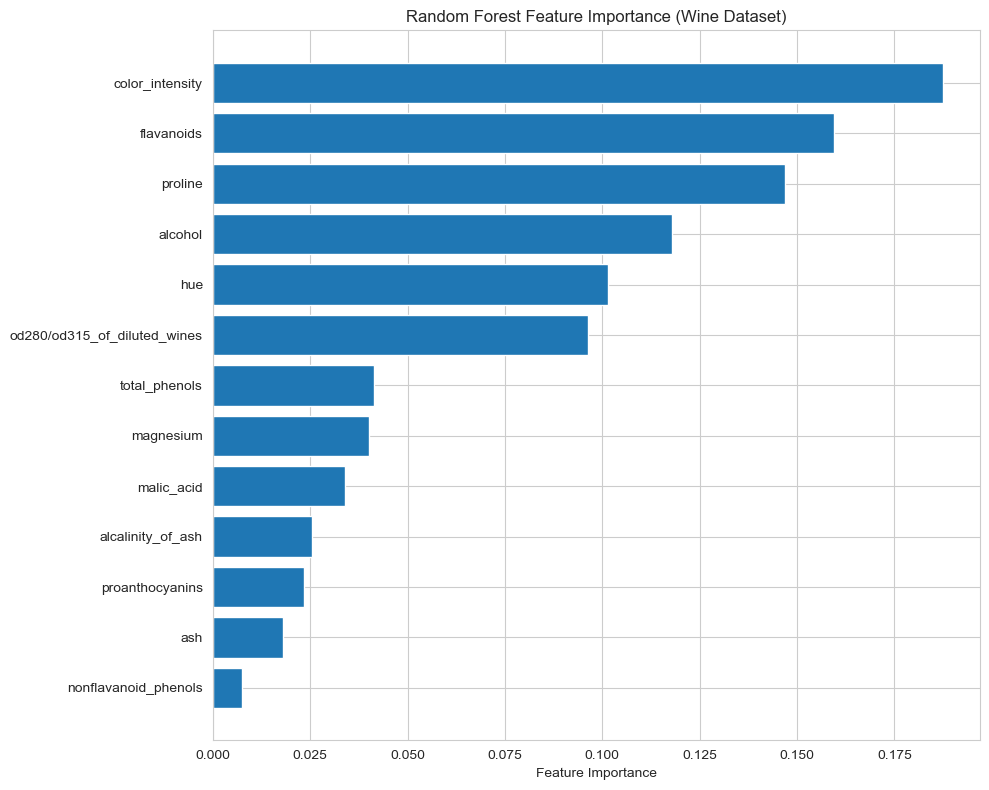


Top 5 Most Important Features:
            Feature  Importance
9   color_intensity    0.187580
6        flavanoids    0.159561
12          proline    0.146799
0           alcohol    0.117913
10              hue    0.101538

💡 Feature importance shows which features the trees used most for splitting
✅ Task 3.2 Complete!


In [9]:
# TODO 3.2: Extract and visualize feature importance from Random Forest
# Requirements:
#   1. Get feature_importances_ from the Random Forest
#   2. Create a DataFrame with features and their importance
#   3. Sort by importance
#   4. Create a horizontal bar plot

# Your code here:
# Get feature importances
importances = rf.feature_importances_

# Create DataFrame
feature_imp = pd.DataFrame({
    'Feature': X_wine.columns,
    'Importance': importances
})

# Sort by importance
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
# Create horizontal bar plot
plt.barh(feature_imp['Feature'], feature_imp['Importance'])
plt.gca().invert_yaxis()  # Most important at the top
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Wine Dataset)")
plt.tight_layout()
plt.show()

# Print top features
print("\nTop 5 Most Important Features:")
print(feature_imp.head())

print("\n💡 Feature importance shows which features the trees used most for splitting")
print("✅ Task 3.2 Complete!")

### Task 3.3: Effect of Number of Trees

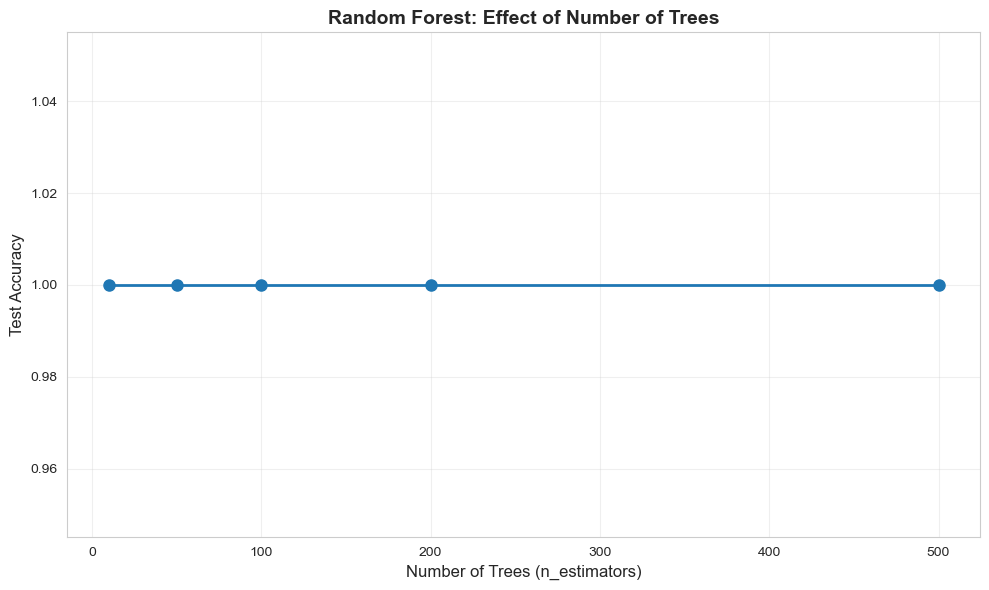


Best n_estimators: 10
Best accuracy: 1.0000

💡 More trees = better performance but diminishing returns
   Also increases training time!

✅ Task 3.3 Complete!


In [10]:
# TODO 3.3: See how performance changes with number of trees
# Requirements:
#   1. Try different n_estimators: [10, 50, 100, 200, 500]
#   2. Calculate test accuracy for each
#   3. Plot the results
#   4. Note where performance plateaus

# Your code here:
n_estimators_list = [10, 50, 100, 200, 500]
test_accs = []

for n_est in n_estimators_list:
    # Create and train Random Forest with this n_estimators
    rf_temp = RandomForestClassifier(
        n_estimators=n_est,
        max_depth=10,
        random_state=42
    )
    rf_temp.fit(X_train_w, y_train_w)
    
    # Calculate test accuracy
    acc = accuracy_score(y_test_w, rf_temp.predict(X_test_w))
    
    # Append to list
    test_accs.append(acc)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, test_accs, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Random Forest: Effect of Number of Trees', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nBest n_estimators: {n_estimators_list[np.argmax(test_accs)]}")
print(f"Best accuracy: {max(test_accs):.4f}")
print("\n💡 More trees = better performance but diminishing returns")
print("   Also increases training time!")
print("\n✅ Task 3.3 Complete!")

---

## 🔧 Exercise 4: Hyperparameter Tuning

Find the optimal tree configuration!

### Task 4.1: Grid Search for Decision Tree

In [11]:
# TODO 4.1: Use GridSearchCV to find best Decision Tree parameters
# Requirements:
#   1. Define parameter grid for max_depth, min_samples_split, min_samples_leaf
#   2. Use GridSearchCV with 5-fold cross-validation
#   3. Fit on training data
#   4. Print best parameters and best score

# Your code here:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit
grid_search.fit(X_train_w, y_train_w)
# Results
print("Grid Search Results:")
print("="*50)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test the best model
best_dt = grid_search.best_estimator_
test_acc = best_dt.score(X_test_w, y_test_w)
print(f"Test accuracy: {test_acc:.4f}")

if test_acc > 0.90:
    print("\n✅ Excellent! Tuned tree performs great!")
    print("🎉 Task 4.1 Complete!")

Grid Search Results:
Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV score: 0.9303
Test accuracy: 1.0000

✅ Excellent! Tuned tree performs great!
🎉 Task 4.1 Complete!


### Task 4.2: Grid Search for Random Forest

In [12]:
# TODO 4.2: Tune Random Forest hyperparameters
# Try different combinations of n_estimators, max_depth, and min_samples_split

# Your code here:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

print("Tuning Random Forest...")
print(f"Total combinations to try: {3 * 3 * 2}")

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit (this may take a minute)
grid_search_rf.fit(X_train_w, y_train_w)

print("\nRandom Forest Grid Search Results:")
print("="*50)
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best CV score: {grid_search_rf.best_score_:.4f}")

# Test
best_rf = grid_search_rf.best_estimator_
test_acc_rf = best_rf.score(X_test_w, y_test_w)
print(f"Test accuracy: {test_acc_rf:.4f}")

print("\n✅ Task 4.2 Complete!")

Tuning Random Forest...
Total combinations to try: 18

Random Forest Grid Search Results:
Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best CV score: 0.9862
Test accuracy: 1.0000

✅ Task 4.2 Complete!


---

## 🏆 Exercise 5: Final Comparison Challenge

Compare all models you've learned!

### Task 5.1: Complete Model Comparison

🏆 Complete Model Comparison Challenge

              Model CV Mean CV Std Test Acc
Logistic Regression  0.9507 0.0533   0.9722
      Decision Tree  0.8882 0.0697   1.0000
      Random Forest  0.9722 0.0403   1.0000


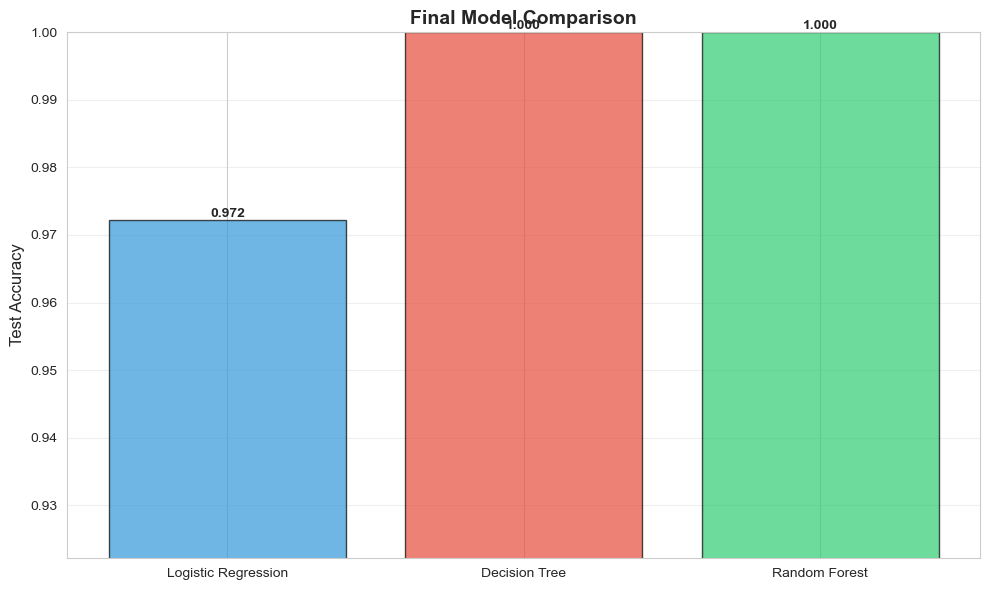


🏆 WINNER: Decision Tree
   Test Accuracy: 1.0000

💡 Key Insights:
  - Trees can capture non-linear patterns
  - Random Forests are usually more stable than single trees
  - Hyperparameter tuning improves performance
  - More complex ≠ always better (depends on data)

✅ Task 5.1 Complete!
🎉 Lab 02 Complete!


In [13]:
# TODO 5.1: Compare Linear, Tree, and Forest models
# Requirements:
#   1. Train: Logistic Regression, Decision Tree (tuned), Random Forest (tuned)
#   2. Evaluate all with cross-validation
#   3. Test on hold-out set
#   4. Create comprehensive comparison table
#   5. Identify the best model

print("🏆 Complete Model Comparison Challenge")
print("="*70)

# Your complete solution here:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': best_dt,  # From Task 4.1
    'Random Forest': best_rf   # From Task 4.2
}

results = []
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_w, y_train_w, cv=cv)
    
    # Train on full training set
    model.fit(X_train_w, y_train_w)
    
    # Test accuracy
    test_acc = model.score(X_test_w, y_test_w)
    
    results.append({
        'Model': name,
        'CV Mean': f"{cv_scores.mean():.4f}",
        'CV Std': f"{cv_scores.std():.4f}",
        'Test Acc': f"{test_acc:.4f}"
    })

# Display results
results_df = pd.DataFrame(results)
print("\n" + results_df.to_string(index=False))
print("="*70)

# Visualization
test_accs = [float(r['Test Acc']) for r in results]
model_names = [r['Model'] for r in results]

plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = plt.bar(model_names, test_accs, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Final Model Comparison', fontsize=14, fontweight='bold')
plt.ylim([min(test_accs) - 0.05, 1.0])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, test_accs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Winner
best_idx = np.argmax(test_accs)
print(f"\n🏆 WINNER: {model_names[best_idx]}")
print(f"   Test Accuracy: {test_accs[best_idx]:.4f}")

print("\n💡 Key Insights:")
print("  - Trees can capture non-linear patterns")
print("  - Random Forests are usually more stable than single trees")
print("  - Hyperparameter tuning improves performance")
print("  - More complex ≠ always better (depends on data)")

print("\n✅ Task 5.1 Complete!")
print("🎉 Lab 02 Complete!")

---

## 🏆 Lab Complete!

### What You Practiced:

✅ **Exercise 1**: Decision Tree classification and visualization  
✅ **Exercise 2**: Decision Tree regression  
✅ **Exercise 3**: Random Forest ensembles and feature importance  
✅ **Exercise 4**: Hyperparameter tuning with GridSearchCV  
✅ **Exercise 5**: Comprehensive model comparison  

### Key Takeaways:

1. **Decision Trees**:
   - Capture non-linear relationships naturally
   - Easy to visualize and interpret
   - Prone to overfitting without constraints
   - Key parameters: `max_depth`, `min_samples_split`, `min_samples_leaf`

2. **Random Forests**:
   - Ensemble of many decision trees
   - More stable and robust than single trees
   - Less prone to overfitting
   - Provides feature importance rankings
   - More trees = better (but diminishing returns)

3. **When to Use Tree-Based Models**:
   - ✅ Non-linear relationships in data
   - ✅ Mixed feature types (categorical + numerical)
   - ✅ Need feature importance
   - ✅ Don't need feature scaling
   - ❌ High-dimensional sparse data
   - ❌ Need linear interpretability

4. **Linear vs Tree Models**:
   - **Linear**: Fast, interpretable coefficients, needs scaling
   - **Trees**: Handle non-linearity, no scaling needed, feature importance

### Decision Tree Cheat Sheet:

```python
# Prevent Overfitting:
- max_depth: Limit tree depth (start with 5-10)
- min_samples_split: Minimum samples to split a node (try 5-10)
- min_samples_leaf: Minimum samples per leaf (try 2-5)
- max_features: Number of features per split (for Random Forest)

# Random Forest Tips:
- Start with n_estimators=100
- More trees = slower but often better
- Can use all CPU cores: n_jobs=-1
- Check feature_importances_ for insights
```

### Next Steps:

- Try **Lab 03** for a mini-project combining everything!
- Experiment with Gradient Boosting (coming soon!)
- Apply these models to your own datasets
- Try ensemble methods (stacking, voting)

**Fantastic work! You've mastered tree-based models! 🌲🎉**